# InSituPy demonstration - Investigate gene expression and cell density along an axis

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import mellon
import palantir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")

In [5]:
xd = read_xenium(insitupy_project)
xd.load_images()
xd.load_cells()

Loading images...
['nuclei', 'CD20', 'HER2', 'DAPI', 'HE']
Loading cells...
	No alternative cells found...


In [6]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connec

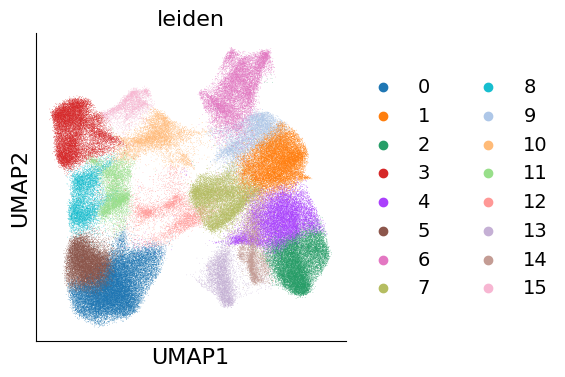

In [7]:
import scanpy as sc
sc.pl.umap(adata=xd.cells.matrix, color="leiden")

## Import annotations

In [8]:
xd.import_annotations(
    files=["./demo_annotations/annotations-Tumor.geojson",
           "./demo_annotations/demo_annotations.geojson",
           "./demo_annotations/demo_points.geojson"],
    keys=["Tumor", "Demo", "Demo"]
)

xd.import_regions(
    files="./demo_regions/regions-Tumor.geojson",
    keys="Tumor"
)

Importing annotations...
Importing regions...


## Select small region for demonstration purposes

In [9]:
xdcrop = xd.crop(region_tuple=("Tumor", "Selected Tumor"))

# access transcriptomic data in anndata format from InSituData object
adata = xdcrop.cells.matrix

## Calculate density using kernel density or `Mellon`

The kernel density can be used to identify regions with an increased density of a certain cell type (e.g. immune cells).

In [10]:
from insitupy.utils._calc import calc_grouped_log_density

In [11]:

# Example usage
calc_grouped_log_density(
    adata,
    groupby='cell_type',
    mode="gauss",
    inplace=True)

100%|██████████| 18/18 [00:04<00:00,  3.91it/s]


In [12]:
# Example usage
calc_grouped_log_density(
    adata,
    groupby='cell_type',
    mode="mellon",
    inplace=True)


  0%|          | 0/18 [00:00<?, ?it/s]

[2024-11-12 19:13:37,755] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (4,399) >= n_samples (4,399) and rank = 1.0.
[2024-11-12 19:13:37,757] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:13:38,255] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:13:38,698] [INFO    ] Using covariance function Matern52(ls=239.44837480917).
[2024-11-12 19:13:41,068] [INFO    ] Using rank 4,399 covariance representation.
[2024-11-12 19:13:42,567] [INFO    ] Running inference using L-BFGS-B.


  6%|▌         | 1/18 [00:08<02:19,  8.23s/it]

[2024-11-12 19:13:45,589] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (735) >= n_samples (735) and rank = 1.0.
[2024-11-12 19:13:45,590] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:13:45,920] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:13:46,117] [INFO    ] Using covariance function Matern52(ls=355.4349887523831).
[2024-11-12 19:13:47,173] [INFO    ] Using rank 735 covariance representation.
[2024-11-12 19:13:47,339] [INFO    ] Running inference using L-BFGS-B.


 11%|█         | 2/18 [00:11<01:21,  5.07s/it]

[2024-11-12 19:13:48,458] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (585) >= n_samples (585) and rank = 1.0.
[2024-11-12 19:13:48,459] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:13:48,770] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:13:48,956] [INFO    ] Using covariance function Matern52(ls=311.61934463569906).
[2024-11-12 19:13:49,910] [INFO    ] Using rank 585 covariance representation.
[2024-11-12 19:13:50,036] [INFO    ] Running inference using L-BFGS-B.


 17%|█▋        | 3/18 [00:13<00:59,  3.95s/it]

[2024-11-12 19:13:51,063] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (539) >= n_samples (539) and rank = 1.0.
[2024-11-12 19:13:51,064] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:13:51,421] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:13:51,669] [INFO    ] Using covariance function Matern52(ls=404.20186883004015).
[2024-11-12 19:13:53,082] [INFO    ] Using rank 539 covariance representation.
[2024-11-12 19:13:53,229] [INFO    ] Running inference using L-BFGS-B.


 22%|██▏       | 4/18 [00:17<00:53,  3.83s/it]

[2024-11-12 19:13:54,712] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (5,252) and rank = 1.0.
[2024-11-12 19:13:54,713] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:13:55,094] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:13:55,336] [INFO    ] Using covariance function Matern52(ls=196.37242964432804).
[2024-11-12 19:13:55,338] [INFO    ] Computing 5,000 landmarks with k-means clustering.
[2024-11-12 19:14:03,451] [INFO    ] Using rank 5,000 covariance representation.
[2024-11-12 19:14:05,392] [INFO    ] Running inference using L-BFGS-B.


 28%|██▊       | 5/18 [00:31<01:37,  7.53s/it]

[2024-11-12 19:14:08,811] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (2,304) >= n_samples (2,304) and rank = 1.0.
[2024-11-12 19:14:08,812] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:09,126] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:09,314] [INFO    ] Using covariance function Matern52(ls=337.37727877805037).
[2024-11-12 19:14:10,609] [INFO    ] Using rank 2,304 covariance representation.
[2024-11-12 19:14:11,083] [INFO    ] Running inference using L-BFGS-B.


 33%|███▎      | 6/18 [00:35<01:16,  6.36s/it]

[2024-11-12 19:14:12,892] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (8,633) and rank = 1.0.
[2024-11-12 19:14:12,894] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:13,232] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:13,428] [INFO    ] Using covariance function Matern52(ls=293.46151061703705).
[2024-11-12 19:14:13,430] [INFO    ] Computing 5,000 landmarks with k-means clustering.
[2024-11-12 19:14:21,498] [INFO    ] Using rank 5,000 covariance representation.
[2024-11-12 19:14:24,154] [INFO    ] Running inference using L-BFGS-B.


 39%|███▉      | 7/18 [00:51<01:43,  9.44s/it]

[2024-11-12 19:14:28,683] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,295) >= n_samples (1,295) and rank = 1.0.
[2024-11-12 19:14:28,683] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:29,003] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:29,205] [INFO    ] Using covariance function Matern52(ls=362.90922766565643).
[2024-11-12 19:14:30,409] [INFO    ] Using rank 1,295 covariance representation.
[2024-11-12 19:14:30,641] [INFO    ] Running inference using L-BFGS-B.


 44%|████▍     | 8/18 [00:55<01:16,  7.64s/it]

[2024-11-12 19:14:32,467] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (178) >= n_samples (178) and rank = 1.0.
[2024-11-12 19:14:32,468] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:32,775] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:32,970] [INFO    ] Using covariance function Matern52(ls=754.8453492752406).
[2024-11-12 19:14:33,850] [INFO    ] Using rank 178 covariance representation.
[2024-11-12 19:14:33,967] [INFO    ] Running inference using L-BFGS-B.


 50%|█████     | 9/18 [00:57<00:54,  6.03s/it]

[2024-11-12 19:14:34,948] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (58) >= n_samples (58) and rank = 1.0.
[2024-11-12 19:14:34,949] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:35,228] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:35,423] [INFO    ] Using covariance function Matern52(ls=2720.4988672303475).
[2024-11-12 19:14:36,296] [INFO    ] Using rank 58 covariance representation.
[2024-11-12 19:14:36,412] [INFO    ] Running inference using L-BFGS-B.


 56%|█████▌    | 10/18 [00:59<00:39,  4.88s/it]

[2024-11-12 19:14:37,247] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (150) >= n_samples (150) and rank = 1.0.
[2024-11-12 19:14:37,248] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:37,571] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:37,761] [INFO    ] Using covariance function Matern52(ls=1040.5173654213668).
[2024-11-12 19:14:38,635] [INFO    ] Using rank 150 covariance representation.
[2024-11-12 19:14:38,750] [INFO    ] Running inference using L-BFGS-B.


 61%|██████    | 11/18 [01:02<00:28,  4.12s/it]

[2024-11-12 19:14:39,649] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (74) >= n_samples (74) and rank = 1.0.
[2024-11-12 19:14:39,651] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:39,974] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:40,165] [INFO    ] Using covariance function Matern52(ls=1655.3290584117442).
[2024-11-12 19:14:41,143] [INFO    ] Using rank 74 covariance representation.
[2024-11-12 19:14:41,265] [INFO    ] Running inference using L-BFGS-B.


 67%|██████▋   | 12/18 [01:04<00:21,  3.63s/it]

[2024-11-12 19:14:42,155] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (1,064) >= n_samples (1,064) and rank = 1.0.
[2024-11-12 19:14:42,157] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:42,457] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:42,647] [INFO    ] Using covariance function Matern52(ls=232.85032589086492).
[2024-11-12 19:14:43,738] [INFO    ] Using rank 1,064 covariance representation.
[2024-11-12 19:14:43,998] [INFO    ] Running inference using L-BFGS-B.


 72%|███████▏  | 13/18 [01:07<00:17,  3.45s/it]

[2024-11-12 19:14:45,202] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (10) >= n_samples (10) and rank = 1.0.
[2024-11-12 19:14:45,215] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:45,558] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:45,734] [INFO    ] Using covariance function Matern52(ls=5370.741271655917).
[2024-11-12 19:14:46,567] [INFO    ] Using rank 10 covariance representation.
[2024-11-12 19:14:46,695] [INFO    ] Running inference using L-BFGS-B.


 78%|███████▊  | 14/18 [01:10<00:12,  3.08s/it]

[2024-11-12 19:14:47,428] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (19) >= n_samples (19) and rank = 1.0.
[2024-11-12 19:14:47,430] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:47,707] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:47,908] [INFO    ] Using covariance function Matern52(ls=3287.047799427375).
[2024-11-12 19:14:48,792] [INFO    ] Using rank 19 covariance representation.
[2024-11-12 19:14:48,914] [INFO    ] Running inference using L-BFGS-B.


 83%|████████▎ | 15/18 [01:12<00:08,  2.83s/it]

[2024-11-12 19:14:49,690] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (47) >= n_samples (47) and rank = 1.0.
[2024-11-12 19:14:49,691] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:49,988] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:50,202] [INFO    ] Using covariance function Matern52(ls=1517.943187234375).
[2024-11-12 19:14:51,093] [INFO    ] Using rank 47 covariance representation.
[2024-11-12 19:14:51,219] [INFO    ] Running inference using L-BFGS-B.


 89%|████████▉ | 16/18 [01:14<00:05,  2.70s/it]

[2024-11-12 19:14:52,087] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (99) >= n_samples (99) and rank = 1.0.
[2024-11-12 19:14:52,088] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:52,384] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:52,583] [INFO    ] Using covariance function Matern52(ls=1095.5308088746292).
[2024-11-12 19:14:53,586] [INFO    ] Using rank 99 covariance representation.
[2024-11-12 19:14:53,715] [INFO    ] Running inference using L-BFGS-B.


 94%|█████████▍| 17/18 [01:17<00:02,  2.66s/it]

[2024-11-12 19:14:54,660] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (2) >= n_samples (2) and rank = 1.0.
[2024-11-12 19:14:54,661] [INFO    ] Computing nearest neighbor distances.
[2024-11-12 19:14:54,886] [INFO    ] Using embedding dimensionality d=2. Use d_method="fractal" to enable effective density normalization.
[2024-11-12 19:14:55,057] [INFO    ] Using covariance function Matern52(ls=35080.27609941753).
[2024-11-12 19:14:55,884] [INFO    ] Using rank 2 covariance representation.
[2024-11-12 19:14:56,003] [INFO    ] Running inference using L-BFGS-B.


100%|██████████| 18/18 [01:19<00:00,  4.40s/it]


The results are saved in `.cells.matrix.obsm["density-{method}']` and can be viewed using `.show()`.

In [13]:
adata

AnnData object with n_obs × n_vars = 25443 × 313
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'OT', 'X_pca', 'X_umap', 'spatial', 'density-gauss', 'density-mellon'
    varm: 'OT', 'PCs', 'binned_expression'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

In [14]:
xdcrop.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


<center><img src="./demo_screenshots/kernel_density.png" width="600"/></center>

## Visualize effects along an axis

Alternatively to visualizing the cellular gene expression or density in 2D as shown above, it is also possible to visualize it along an axis. In the example scenario below we calculate the distance of each cell to the tumor center and visualize the cellular density and gene expression along this axis.

### Calculate distance of cells to annotations

To generate an axis we use here a selected set of annotations and calculate the distance of all cells to these annotations. For demonstration purposes we selected a region of the breast cancer dataset and annotated tumor cells within this region:
<center><img src="./demo_screenshots/tumor_region_annotation_example.png" width="600"/></center>

These annotations and the region can be imported from files in the repository but of course it would be also possible to do own annotations and select an own region and save the results using `.store_geometries()`.

In [15]:
from insitupy import calc_distance_of_cells_from

In [16]:
calc_distance_of_cells_from(
    data=xdcrop,
    annotation_key="Demo",
    annotation_class="Tumor center",
    # region_key="Tumor",
    # region_name="Selected Tumor"
)

Calculate the distance of cells from the annotation "Tumor center"
Saved distances to `.cells.matrix.obsm["distance_from"]["Tumor center"]`


The distances can be accessed in `.cells.matrix.obsm["distance_from"]`

In [17]:
xdcrop.cells.matrix.obsm["distance_from"]

,Tumor center
4305,584.482179
4306,575.386939
4307,573.848256
4308,565.253040
4309,557.529886
...,...
118570,162.485566
118571,171.837771
118572,175.984350
118575,147.131136


### Visualize the results using `napari`

Using `.show()` we can visualize the results and see the distance values per cell:
<center><img src="./demo_screenshots/distances_from_tumor_example.jpg" width="200"/></center>


## Plot cell abundance along axis

In addition to exploring the density of a certain cell type in two dimension, one can also explore it along a certain axis.

In [18]:
from insitupy import CustomPalettes
from insitupy._constants import DEFAULT_CATEGORICAL_CMAP
from insitupy.plotting import cell_abundance_along_obs_val

Retrieve `obs_val` from .obsm.


C:\Users\ge37voy\Github\InSituPy\insitupy\plotting\expression_along_axis.py:1084: UserWarning: The palette list has more values (20) than needed (18), which may not be intended.
  h = sns.kdeplot(data=data, x=axis,


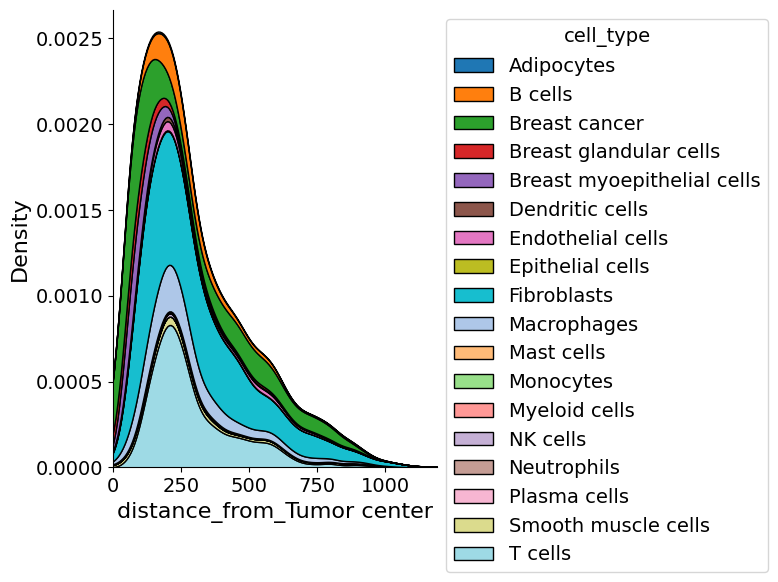

In [19]:
cell_abundance_along_obs_val(
    adata=xdcrop.cells.matrix,
    axis=("distance_from", "Tumor center"),
    groupby="cell_type",
    kde=True
)

Retrieve `obs_val` from .obsm.


C:\Users\ge37voy\Github\InSituPy\insitupy\plotting\expression_along_axis.py:1084: UserWarning: The palette list has more values (20) than needed (18), which may not be intended.
  h = sns.kdeplot(data=data, x=axis,


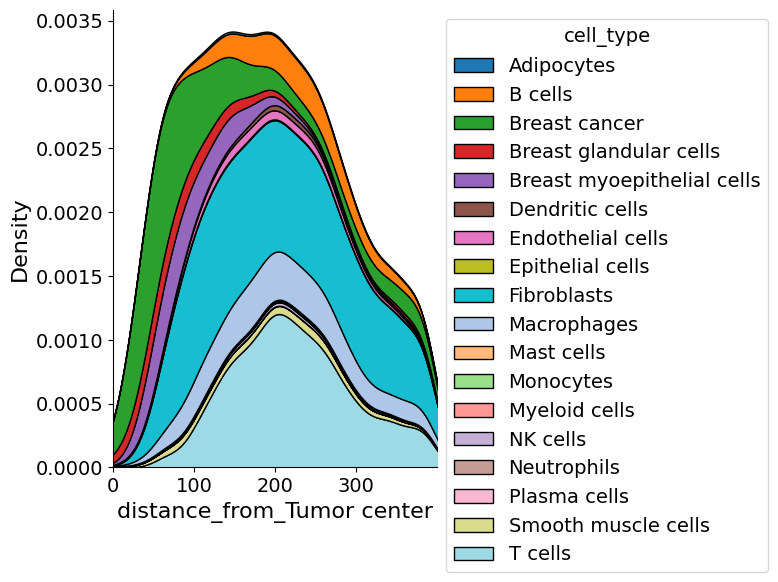

In [20]:
cell_abundance_along_obs_val(
    adata=xdcrop.cells.matrix,
    axis=("distance_from", "Tumor center"),
    groupby="cell_type",
    xlim=(0,400),
    kde=True
)

## Explore cellular density and gene expression along axis

In single-cell spatial transcriptomic data it is important to explore the gene expression on a cell type level. The `cell_expression_along_axis` function let's you do so.

Retrieve `obs_val` from .obsm.


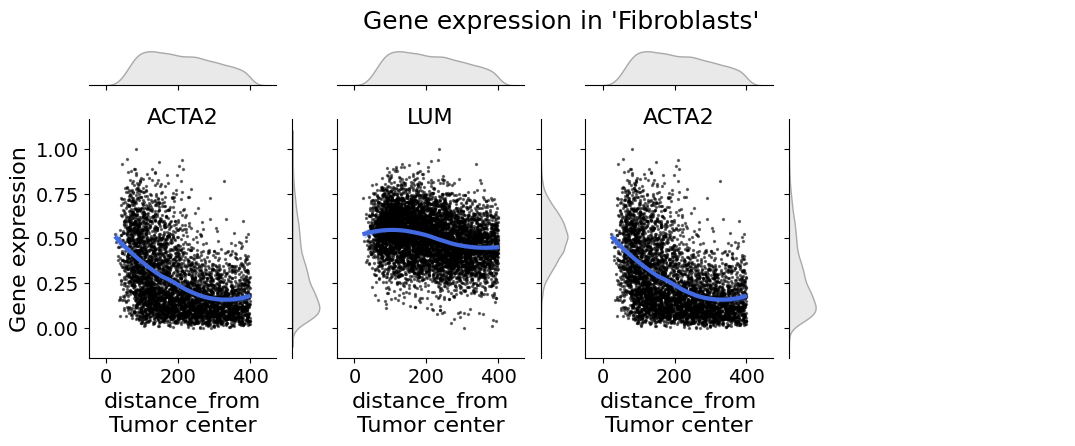

In [56]:
from insitupy.plotting import cell_expression_along_axis

# Example usage:
cell_expression_along_axis(
    adata=xdcrop.cells.matrix,
    axis=("distance_from", "Tumor center"),
    cell_type_column="cell_type",
    cell_type="Fibroblasts",
    genes=["ACTA2", "LUM", "ACTA2"],
    xlim=(0, 400),
    kde=False,
    fit_reg=True,
    min_expression=1.5
    )


## Identify non-random expression patterns

To identify non-random expression patterns, we use an approach from [Kueckelhaus et al., 2024](https://www.nature.com/articles/s41467-024-50904-x), which is based on the calculation of the total variation of the gene expression pattern, followed by a random permutation of data points to determine how significant this total variation value is.

In [57]:
from insitupy.plotting.expression_along_axis import _select_data
from insitupy.plotting.expression_along_axis import _bin_data
from insitupy.utils._patterns import evaluate_expression_along_axis

In [58]:
#genes = ["LUM", "CRHBP", "ACTA2"]
genes = list(adata.var_names)

In [59]:
evaluation_results = evaluate_expression_along_axis(
    adata=adata,
    genes=genes,
    obs_val=("distance_from", "Tumor center"),
    cell_type_column="cell_type", cell_type="Fibroblasts", xlim=(0,400),
    #bin_data=True, resolution=5,
    parallel=True, n_sim=100, min_expression=1.5
    )

100%|██████████| 313/313 [00:51<00:00,  6.07it/s]


In [60]:
evaluation_results

EvaluateExpressionObject with following attributes: raw_data, result

In [61]:
result_df = evaluation_results.result

In [62]:
result_df

,tv,tv_pval,tv_fdr,spearman_r,spearman_pval,pearson_r,pearson_pval
ABCC11,41.166256,0.000000,0.000000,-0.038365,4.435901e-01,0.003066,9.511982e-01
ACTA2,767.948853,0.000000,0.000000,-0.474369,5.212403e-243,-0.461834,8.285538e-229
ACTG2,555.132690,0.212121,0.553860,-0.171009,1.846621e-27,-0.164497,1.666930e-25
ADAM9,499.774597,0.737374,0.867662,0.067050,9.440525e-05,0.066208,1.155266e-04
ADGRE5,253.624146,0.800000,0.907246,-0.038809,1.184222e-01,-0.041168,9.763990e-02
...,...,...,...,...,...,...,...
VWF,115.588707,0.020202,0.126465,-0.269820,2.701489e-16,-0.269585,2.873005e-16
WARS,396.130920,0.000000,0.000000,-0.101220,7.066236e-08,-0.111391,2.951625e-09
ZEB1,413.050781,0.000000,0.000000,-0.310001,8.981443e-83,-0.289238,7.920419e-72
ZEB2,778.896973,0.112245,0.407987,-0.100641,3.991158e-13,-0.100863,3.543324e-13


Select non-random patterns using total variation-based p-value.

In [63]:
result_df_filtered = result_df[result_df["tv_pval"] <= 0.05].copy()

In [64]:
top_correlated_genes = result_df_filtered["spearman_r"].dropna().abs().sort_values(ascending=False)[:10].index

In [65]:
from insitupy.utils._patterns import plot_evaluation, loess_regress

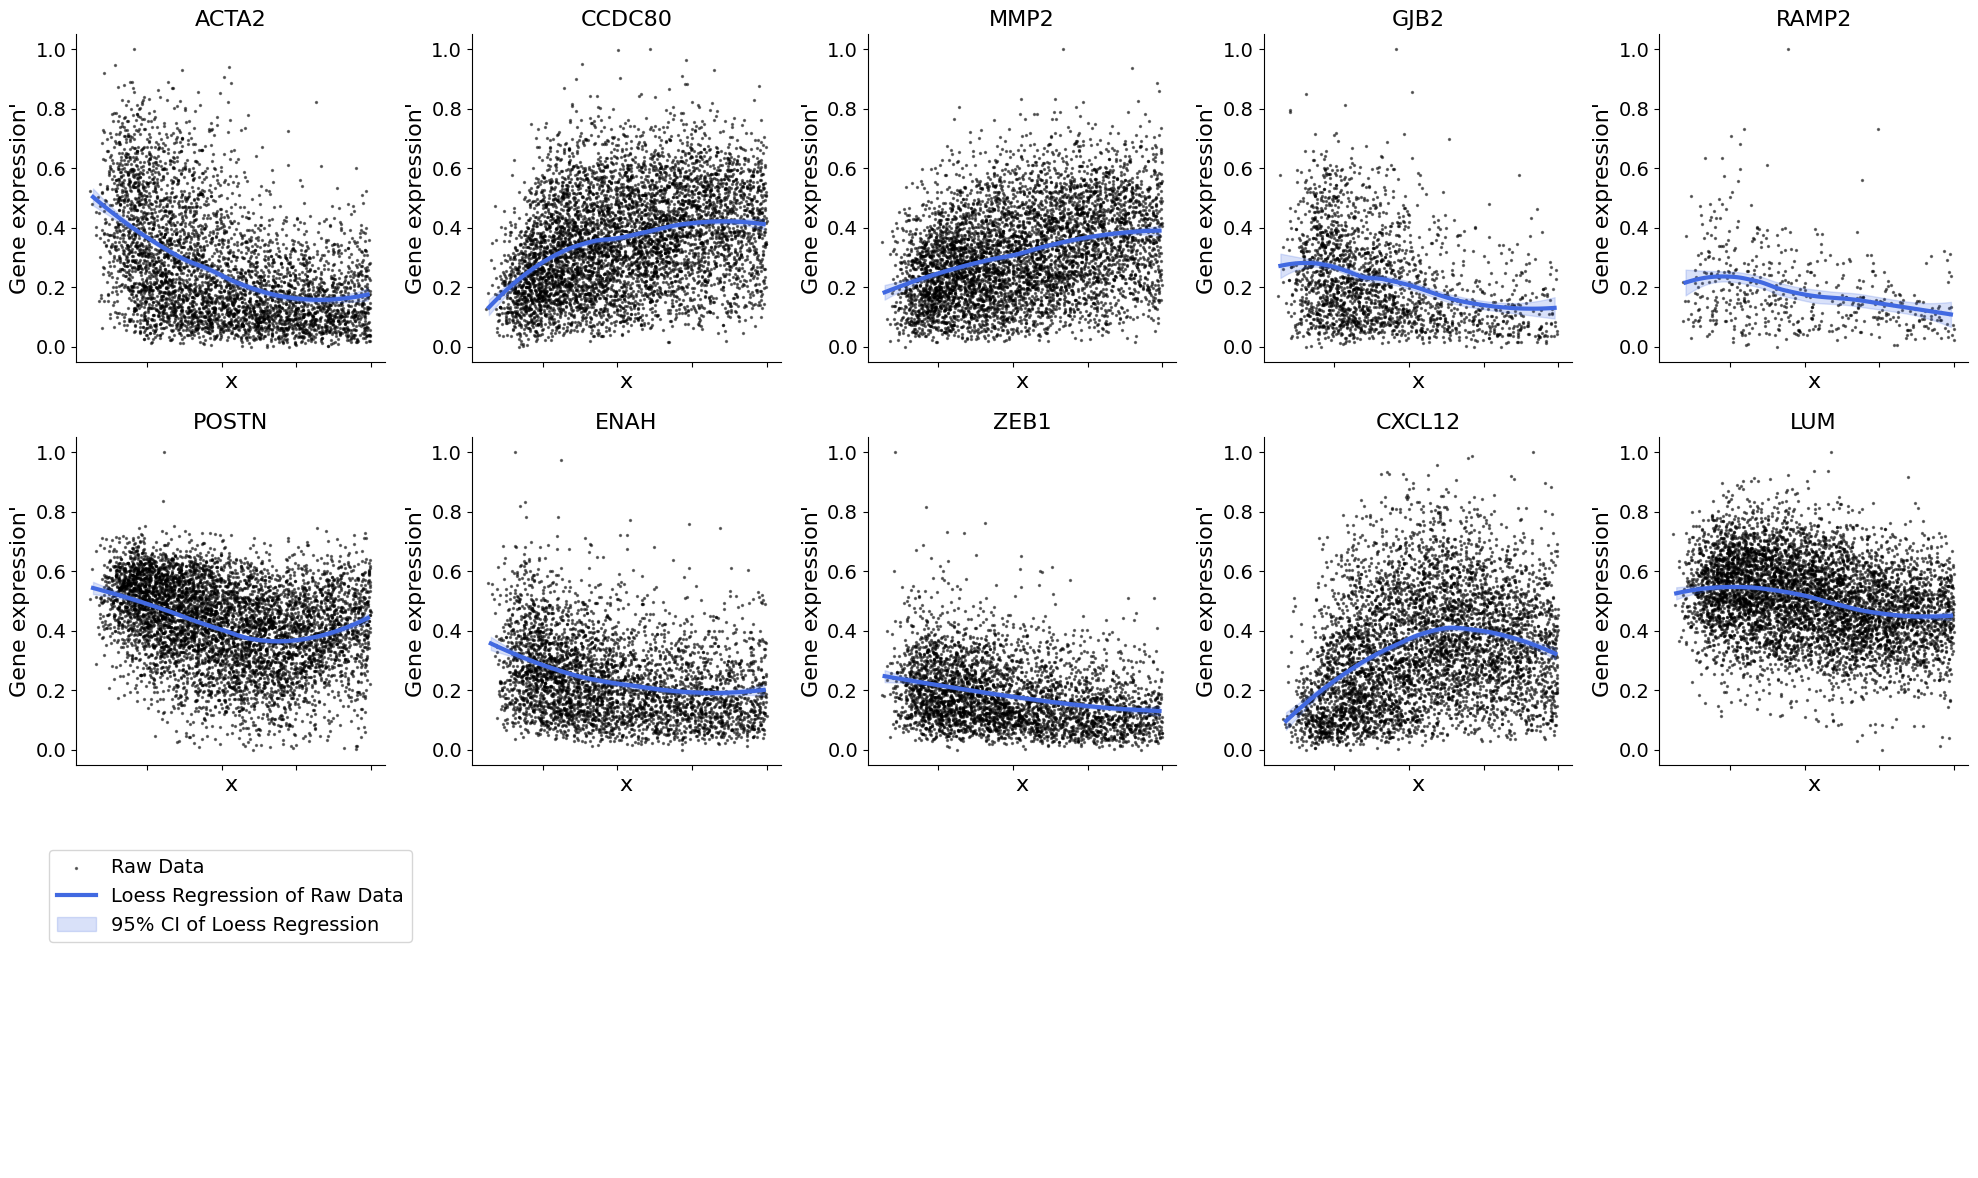

In [66]:
plot_evaluation(evaluation_results, genes=top_correlated_genes, maxcols=5, font_scale_factor=1)

## Clustering of patterns

The following section shows a possible strategy to cluster the expression patterns according to their shape using Dynamic Time Warping for calculating the similarity between patterns followed by hierarchical clustering to group them into similar patterns.

In [67]:
loess_res = loess_regress(evaluation_results, genes=result_df_filtered.index)

100%|██████████| 64/64 [00:07<00:00,  8.17it/s]


In [69]:
# reshape and rename dataframe
loess_res.index.names = ["gene", "pos"]
loess_res

x    y_pred       std  conf_lower  conf_upper
gene   pos                                                        
ABCC11 0     40.271538  0.168002  0.030752    0.107544    0.228460
       1     43.921582  0.166332  0.028973    0.109372    0.223292
       2     47.571626  0.164725  0.027263    0.111125    0.218324
       3     51.221671  0.163181  0.025625    0.112803    0.213560
       4     54.871715  0.161703  0.024060    0.114401    0.209005
...                ...       ...       ...         ...         ...
ZEB1   93   380.993818  0.132618  0.006078    0.120702    0.144534
       94   384.791397  0.132185  0.006477    0.119486    0.144884
       95   388.588976  0.131775  0.006900    0.118246    0.145304
       96   392.386555  0.131390  0.007347    0.116986    0.145794
       97   396.184134  0.131028  0.007816    0.115705    0.146351

[6272 rows x 5 columns]

### Reshape data

In [71]:
regpivot = pd.pivot(loess_res.reset_index(), index="pos", columns="gene", values="y_pred")
regpivot

gene,ABCC11,ACTA2,ADH1B,AKR1C1,ANKRD30A,AVPR1A,BASP1,CAV1,CCDC80,CCL20,...,SQLE,SVIL,TCF4,TIFA,TIGIT,TNFRSF17,TRIB1,VWF,WARS,ZEB1
pos,,,,,,,,,,,,,,,,,,,,,
0,0.168002,0.503511,0.091640,0.138444,0.182430,0.192366,0.188710,0.255560,0.132456,0.139263,...,0.178823,0.311398,0.235238,0.204197,0.216818,0.164583,0.224235,0.192974,0.194995,0.247955
1,0.166332,0.495474,0.097200,0.140670,0.182666,0.201727,0.190338,0.252937,0.142368,0.136363,...,0.180106,0.310386,0.235490,0.204766,0.218601,0.171166,0.225265,0.194761,0.196348,0.246319
2,0.164725,0.487535,0.102632,0.142873,0.182937,0.210746,0.191947,0.250371,0.152073,0.133706,...,0.181343,0.309368,0.235725,0.205340,0.220327,0.177567,0.226252,0.196454,0.197649,0.244687
3,0.163181,0.479695,0.107934,0.145056,0.183244,0.219414,0.193536,0.247863,0.161571,0.131296,...,0.182534,0.308343,0.235941,0.205917,0.221995,0.183784,0.227196,0.198052,0.198895,0.243059
4,0.161703,0.471953,0.113105,0.147218,0.183587,0.227724,0.195103,0.245417,0.170861,0.129136,...,0.183677,0.307311,0.236138,0.206497,0.223604,0.189815,0.228098,0.199551,0.200083,0.241436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.143464,0.168213,0.214477,0.183945,0.250435,0.187406,0.322119,0.178037,0.416762,0.222537,...,0.132029,0.181931,0.174543,0.185069,0.223220,0.181919,0.206984,0.108071,0.151216,0.132618
94,0.142550,0.169909,0.213373,0.182611,0.250579,0.184788,0.323089,0.178283,0.415777,0.227624,...,0.129886,0.180909,0.173243,0.181802,0.224934,0.177983,0.207086,0.107350,0.149623,0.132185
95,0.141629,0.171733,0.212272,0.181259,0.250732,0.182115,0.324023,0.178557,0.414700,0.232913,...,0.127708,0.179918,0.171940,0.178460,0.226757,0.173953,0.207210,0.106653,0.148019,0.131775


### Calculate distance matrix from regression lines

Normalization/Z-scoring necessary to make distance measure independent of expression scale.

In [73]:
from dtaidistance import dtw, clustering
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
from insitupy import CustomPalettes
import seaborn as sns

### Perform standardization by z-scoring

In [74]:
norm = stats.zscore(regpivot.T, axis=1)

### Choose color palette

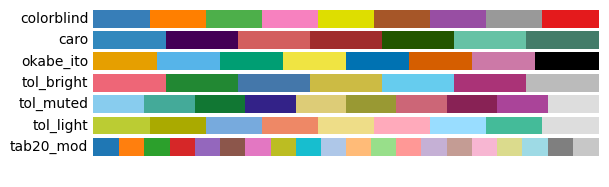

In [75]:
cpal = CustomPalettes()
cpal.show_all()

In [76]:
# choose colormap
cmap = cpal.colorblind

### Calculate distance using Dynamic Time Warping and perform hierarchical clustering
https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html

In [77]:
# calculate distance matrix
dm = dtw.distance_matrix(norm.values, use_mp=True, use_c=True)
dm = pd.DataFrame(dm, index=norm.index, columns=norm.index)

### Hierarchical clustering
model = clustering.LinkageTree(dtw.distance_matrix, dists_options={'use_mp': True, 'use_c': True})
cluster_id = model.fit(norm.values)

# get linkage
Z = model.linkage

### Select distance threshold for clustering

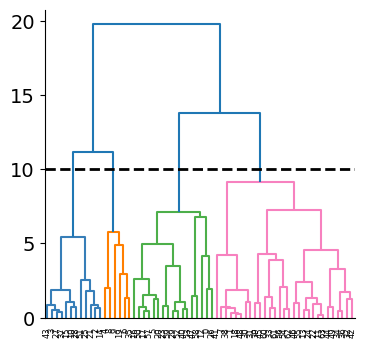

In [78]:
dist_thresh = 10

fig, ax = plt.subplots(1,1)
set_link_color_palette(cmap.colors)
dn = dendrogram(Z, color_threshold=dist_thresh, ax=ax, )
ax.axhline(y=dist_thresh, c="k", linewidth=2, linestyle="dashed")
#plt.savefig("figures/zonated_genes/dendrogram-pattern_clustering.pdf", bbox_inches="tight")
plt.show()

### Extract clusters

In [79]:
# get clusters
clusters = pd.Series(fcluster(Z, t=dist_thresh, criterion='distance'), index=dm.columns, name="cluster")

# map colors to clusters
lut = dict(zip(sorted(clusters.unique()), cmap.colors))
clustercolors = clusters.map(lut)

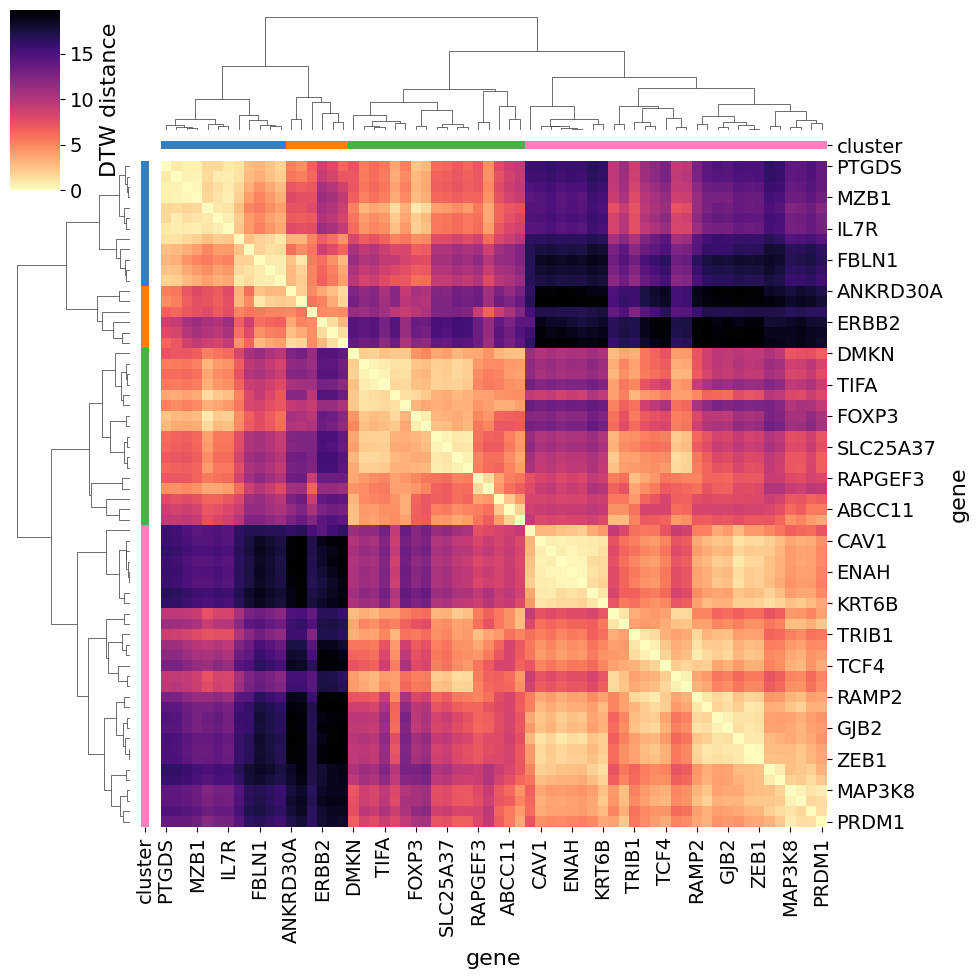

In [80]:
sns.clustermap(dm,
               cmap='magma_r',
               row_linkage=Z, col_linkage=Z,
               row_colors=clustercolors,
               col_colors=clustercolors,
               dendrogram_ratio=0.15, colors_ratio=0.01,
               cbar_kws={
                   'label': 'DTW distance',
               }
              )

#plt.savefig("figures/zonated_genes/heatmap_pattern-clustering.pdf", bbox_inches="tight")
plt.show()

In [81]:
clustercounts = pd.DataFrame(clusters.value_counts()).sort_index()
clustercounts.index.names = ["cluster"]
clustercounts.columns = ["counts"]

C:\Users\ge37voy\AppData\Local\Temp\ipykernel_7248\1440509162.py:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(data=clustercounts.reset_index(), x="cluster", y="counts", palette=cmap.colors, ax=ax)


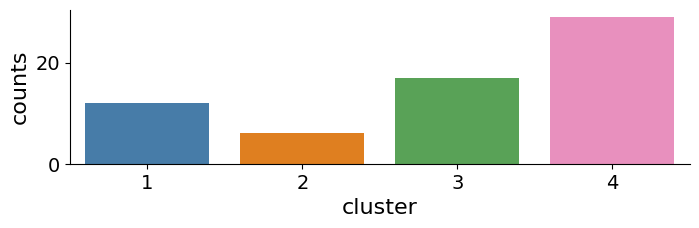

In [82]:
fig, ax = plt.subplots(1,1,figsize=(8,2))
sns.barplot(data=clustercounts.reset_index(), x="cluster", y="counts", palette=cmap.colors, ax=ax)
#plt.savefig("figures/zonated_genes/barplot_clusters.pdf", bbox_inches="tight")
plt.show()

## Plot genes per cluster

In [83]:
genes = clusters.index[clusters == 2]

Retrieve `obs_val` from .obsm.


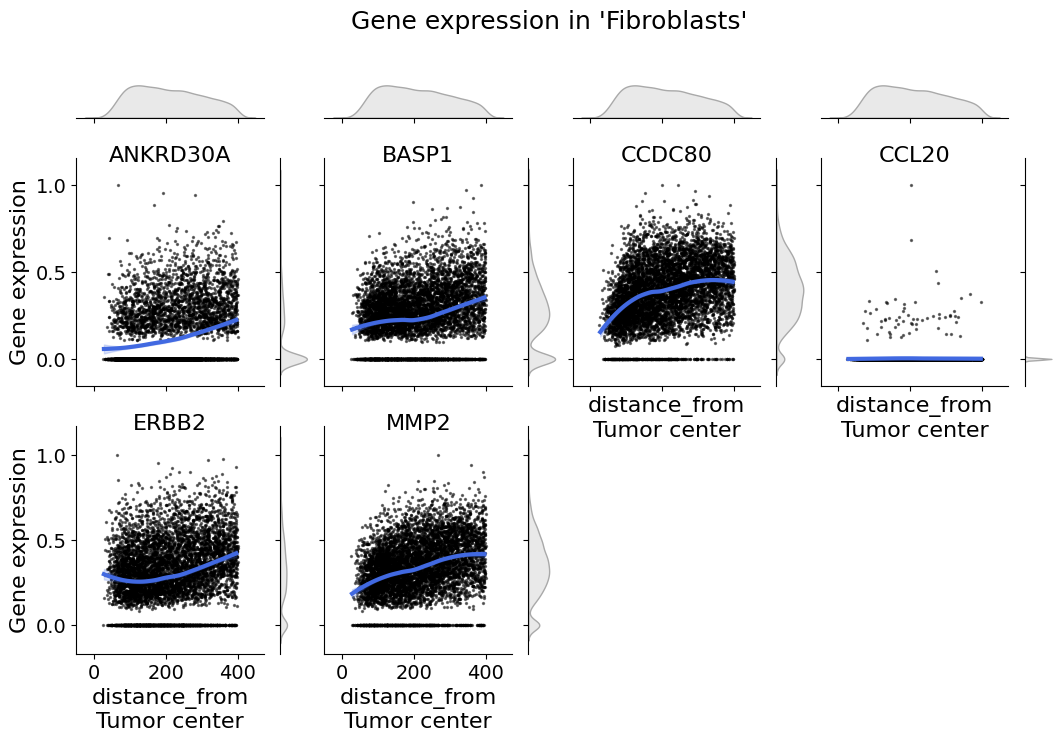

In [86]:
from insitupy.plotting import cell_expression_along_axis

# Example usage:
cell_expression_along_axis(
    adata=xdcrop.cells.matrix,
    axis=("distance_from", "Tumor center"),
    cell_type_column="cell_type",
    cell_type="Fibroblasts",
    genes=genes,
    xlim=(0, 400),
    fit_reg=True
    #min_expression=1.5
    )


### Visualize the average pattern of each cluster
To better understand the content of each cluster, we generate the mean regression line per cluster.

In [87]:
from sklearn.preprocessing import minmax_scale

In [88]:
# scale
norm_minmax = pd.DataFrame(minmax_scale(norm, axis=1), index=norm.index, columns=norm.columns) * 100

# add cluster information
df = pd.merge(left=norm_minmax, right=clusters, left_index=True, right_index=True)

# reshape to long format
df = df.reset_index().melt(id_vars=["gene", "cluster"], var_name="pos", value_name="expression [%]")

# scale position between 0 and 1
df["pos"] = df["pos"] / df["pos"].max()

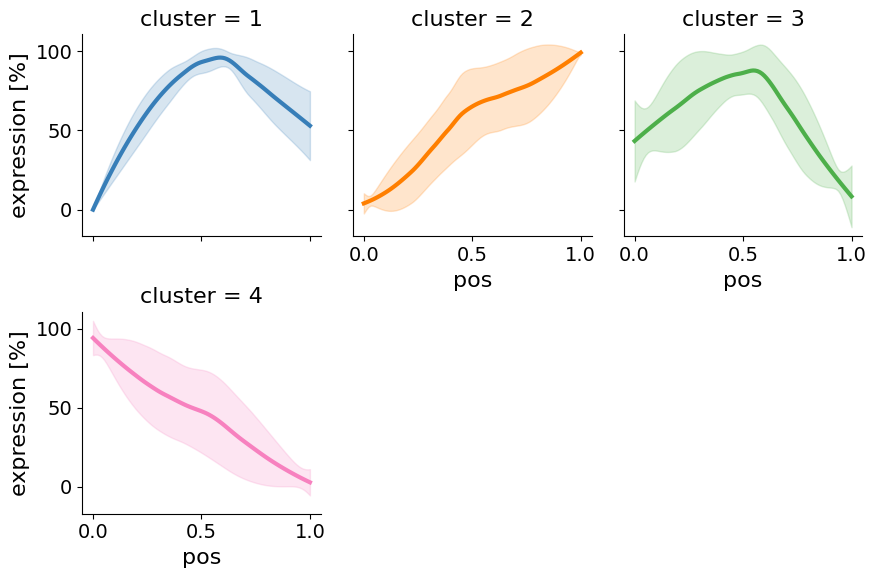

In [89]:
g = sns.FacetGrid(df, col="cluster", hue="cluster", palette=cmap.colors, col_wrap=3)
g.map(sns.lineplot, "pos", "expression [%]", ci="sd", linewidth=3)

#plt.savefig("figures/zonated_genes/lineplot_centerline-per-cluster.pdf", bbox_inches="tight")
plt.show()